In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import pickle
from flask import Flask

In [3]:
# Load the Csv file: (train)
df_train=pd.read_csv(r"data\train.csv")


In [4]:
# Load the Csv file: (test)
df_test=pd.read_csv(r"data\test.csv")

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
cols=['PassengerId','Name','Ticket','Fare','Cabin']
df_train.drop(columns=cols,inplace=True)

In [8]:
df_test.drop(columns=cols,inplace=True)

In [9]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [10]:
df_train.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Embarked    0.002245
dtype: float64

In [11]:
df_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [12]:
df_train['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [13]:
df_train['Age'].mean()

29.69911764705882

In [14]:
df_train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [15]:
df_train.Age.fillna(df_train.Age.mean(),inplace=True)

In [16]:
df_train.Embarked.fillna(df_train.Embarked.mode()[0],inplace=True)

In [17]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [18]:
df_train.isnull().mean()

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Embarked    0.0
dtype: float64

In [19]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [20]:
df_test.isnull().mean()

Pclass      0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Parch       0.000000
Embarked    0.000000
dtype: float64

In [21]:
df_test['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [22]:
df_test['Age'].mean()

30.272590361445783

In [23]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

In [24]:
df_test.isnull().mean()

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Embarked    0.0
dtype: float64

In [25]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [26]:
df_train['Survived'].dtype

dtype('int64')

In [27]:
df_train['Pclass'].dtype

dtype('int64')

In [28]:
df_train['Sex'].dtype

dtype('O')

In [29]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [30]:
Sex_mapping={'male':0,'female':1}
df_train['Sex']=df_train['Sex'].map(Sex_mapping)

In [31]:
df_train['Sex'].dtype

dtype('int64')

In [32]:
df_train['Age'].dtype

dtype('float64')

In [33]:
df_train['SibSp'].dtype

dtype('int64')

In [34]:
df_train['Parch'].dtype

dtype('int64')

In [35]:
df_train['Embarked'].dtype

dtype('O')

In [36]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [37]:
Embarked_mapping={'S':0,'C':1,'Q':2}
df_train['Embarked']=df_train['Embarked'].map(Embarked_mapping)

In [38]:
df_train['Embarked'].dtype

dtype('int64')

In [39]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [40]:
df_test['Pclass'].dtype

dtype('int64')

In [41]:
df_test['Sex'].dtype

dtype('O')

In [42]:
df_test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [43]:
Sex_mapping={'male':0,'female':1}
df_test['Sex']=df_test['Sex'].map(Sex_mapping)

In [44]:
df_test['Sex'].dtype

dtype('int64')

In [45]:
df_test['Age'].dtype

dtype('float64')

In [46]:
df_test['SibSp'].dtype

dtype('int64')

In [47]:
df_test['Parch'].dtype

dtype('int64')

In [48]:
df_test['Embarked'].dtype

dtype('O')

In [49]:
df_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [50]:
Embarked_mapping={'S':0,'C':1,'Q':2}
df_test['Embarked']=df_test['Embarked'].map(Embarked_mapping)

In [51]:
df_test['Embarked'].dtype

dtype('int64')

<Axes: xlabel='Survived'>

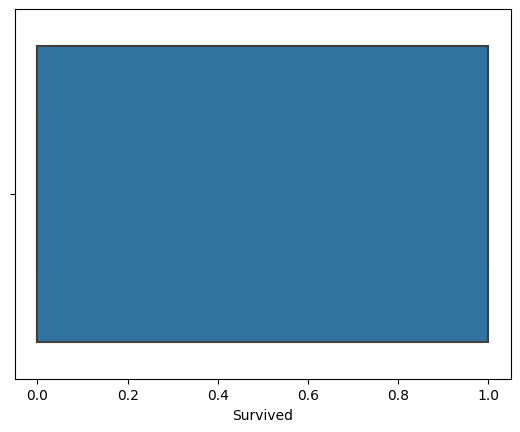

In [52]:
sns.boxplot(x='Survived',data=df_train)

<Axes: xlabel='Pclass'>

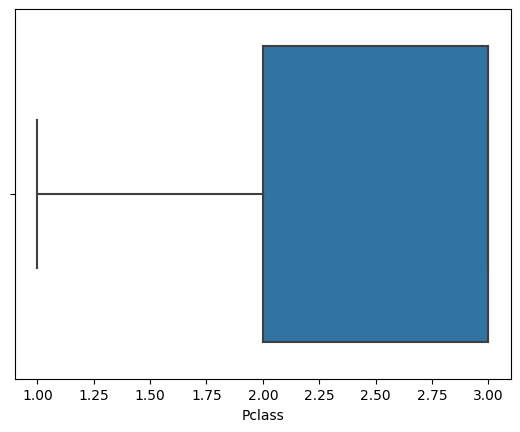

In [53]:
sns.boxplot(x='Pclass',data=df_train)

<Axes: xlabel='Sex'>

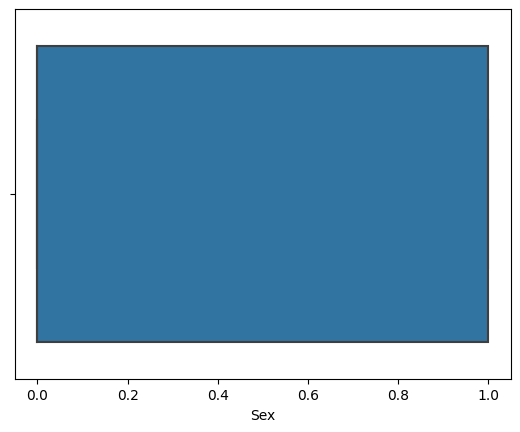

In [54]:
sns.boxplot(x='Sex',data=df_train)

<Axes: xlabel='Age'>

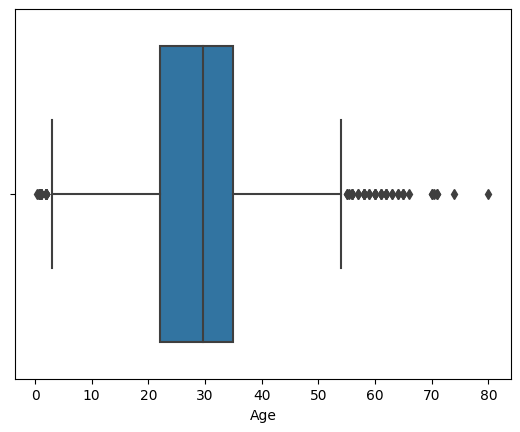

In [55]:
sns.boxplot(x='Age',data=df_train)

In [56]:
# df_train['Age'].quantile([0,0.95])

In [57]:
# low,high=df_train['Age'].quantile([0,0.95])
# sub=df_train['Age'].between(low,high)
# print(sub)
# df_train=df_train[sub]

In [58]:
# sns.boxplot(x='Age',data=df_train)

In [59]:
# data = df_train['Age']
# mean = np.mean(data)
# std = np.std(data)
# threshold = 3.0
# outliers = data[np.abs(data - mean) > threshold * std]
# print("Outliers:", outliers)

In [60]:
# outliers = np.where(np.abs(data - mean) > threshold * std)[0]

# print("Outliers:", outliers)

# if len(outliers) > 0:
#     print("First outlier:", data[outliers[0]])
# else:
#     print("No outliers found")

In [61]:
# df_train['Age'].quantile([96,851])

In [62]:
# data={'Values':df_train}
# df=pd.DataFrame(data)
# def detect_outliers_iqr(dataframe, column, multiplier=1.5):
#       Q1 = dataframe[column].quantile(0.25)
#       Q3 = dataframe[column].quantile(0.75)
#       IQR = Q3 - Q1
#       lower_bound = Q1 - (multiplier * IQR)
#       upper_bound = Q3 + (multiplier * IQR)
#       outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]

#       return outliers

# outliers = detect_outliers_iqr(df,'Values')
# print("Outliers detected:\n", outliers)

<Axes: xlabel='SibSp'>

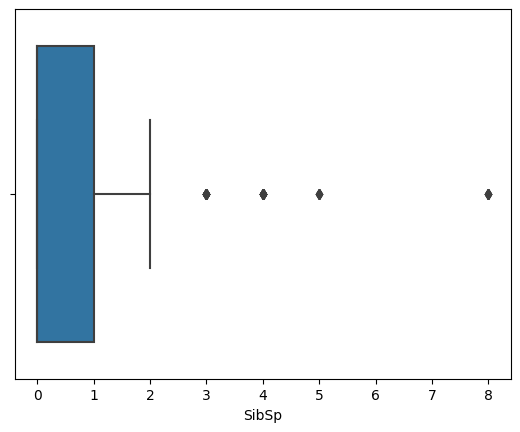

In [63]:
sns.boxplot(x='SibSp',data=df_train)

In [64]:
Q1 =df_train['Age'].quantile(0.25)
Q3 =df_train['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_train['Age'][(df_train['Age'] < lower_bound) | (df_train ['Age']> upper_bound)].dropna()
print("Lower Boundaries: \n", lower_bound)
print("Upper Boundaries: \n", upper_bound)
print("Outliers: \n", outliers)

Lower Boundaries: 
 2.5
Upper Boundaries: 
 54.5
Outliers: 
 7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: Age, Length: 66, dtype: float64


In [65]:
min_Outliers = np.min(lower_bound)
print(min_Outliers)

2.5


In [66]:
max_Outliers = np.max(upper_bound)
print(max_Outliers)

54.5


In [67]:
low=2.5
high=54.5
sub=df_train['Age'].between(low,high)
print(sub)
df_train=df_train[sub]

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Name: Age, Length: 891, dtype: bool


<Axes: xlabel='Age'>

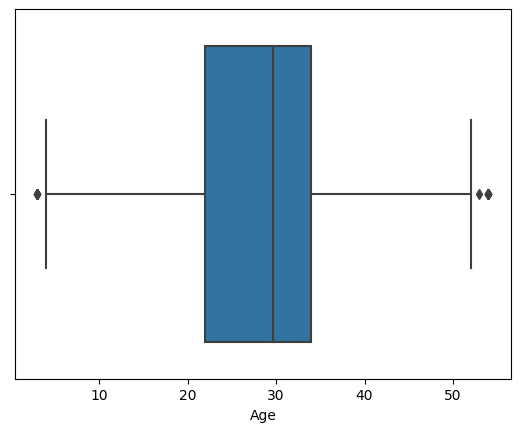

In [68]:
sns.boxplot(x='Age',data=df_train)

<Axes: xlabel='Parch'>

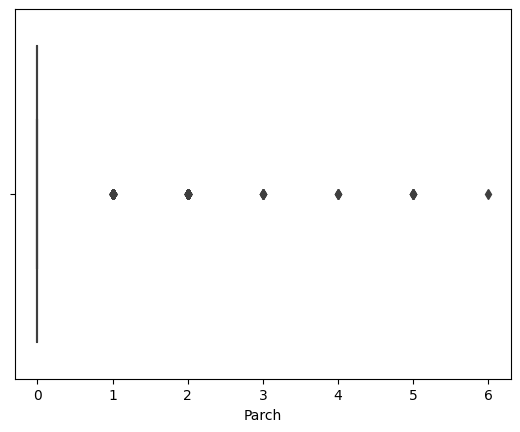

In [69]:
sns.boxplot(x='Parch',data=df_train)

<Axes: xlabel='Embarked'>

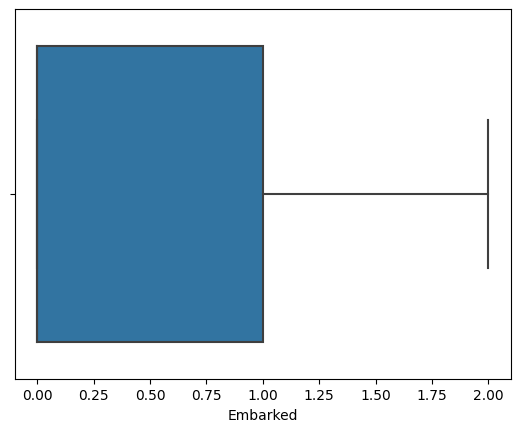

In [70]:
sns.boxplot(x='Embarked',data=df_train)

In [71]:
df_train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.367774,0.553071,-0.027320,-0.030860,0.074199,0.115648
Pclass,-0.367774,1.000000,-0.158243,-0.286128,0.057760,0.018742,0.046417
Sex,0.553071,-0.158243,1.000000,-0.058712,0.122328,0.262800,0.130025
Age,-0.027320,-0.286128,-0.058712,1.000000,-0.182124,-0.131052,-0.009340
SibSp,-0.030860,0.057760,0.122328,-0.182124,1.000000,0.408487,-0.059819
Parch,0.074199,0.018742,0.262800,-0.131052,0.408487,1.000000,-0.079817
Embarked,0.115648,0.046417,0.130025,-0.009340,-0.059819,-0.079817,1.000000


<Axes: >

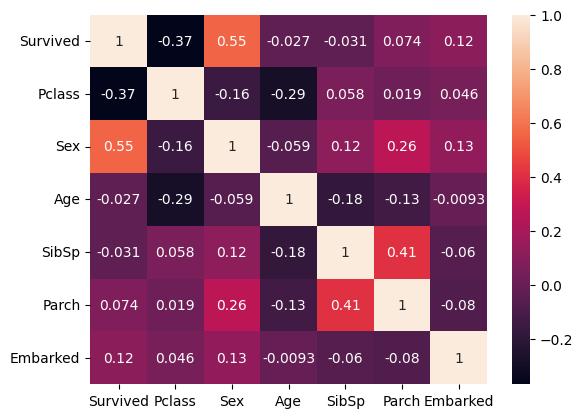

In [72]:
sns.heatmap(df_train.corr(),annot=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2316\1707602906.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

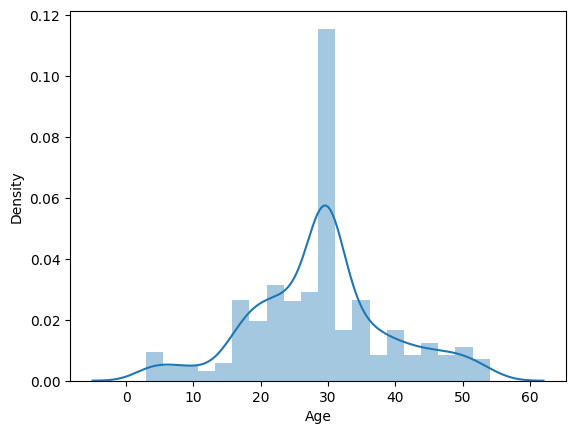

In [73]:
sns.distplot(df_train['Age'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2316\3278051313.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Pclass'])


<Axes: xlabel='Pclass', ylabel='Density'>

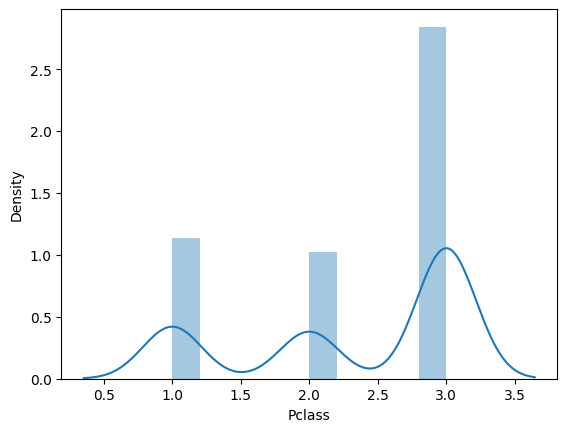

In [74]:
sns.distplot(df_train['Pclass'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2316\1460461425.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Survived'])


<Axes: xlabel='Survived', ylabel='Density'>

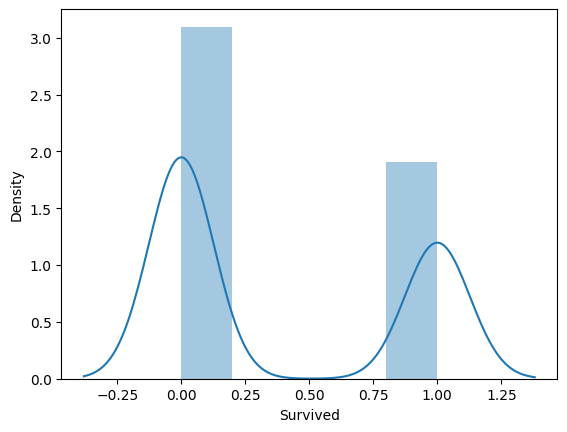

In [75]:
sns.distplot(df_train['Survived'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2316\1731176131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Sex'])


<Axes: xlabel='Sex', ylabel='Density'>

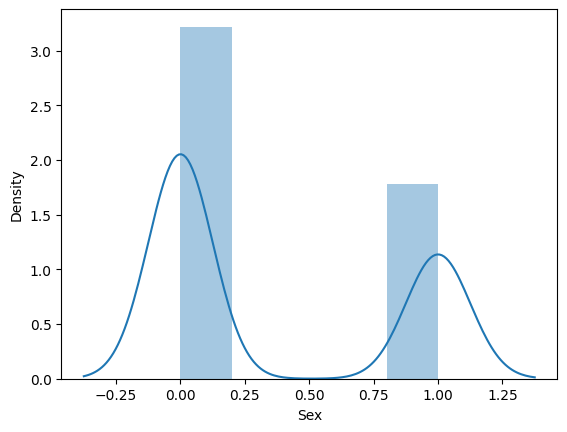

In [76]:
sns.distplot(df_train['Sex'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2316\493793406.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Embarked'])


<Axes: xlabel='Embarked', ylabel='Density'>

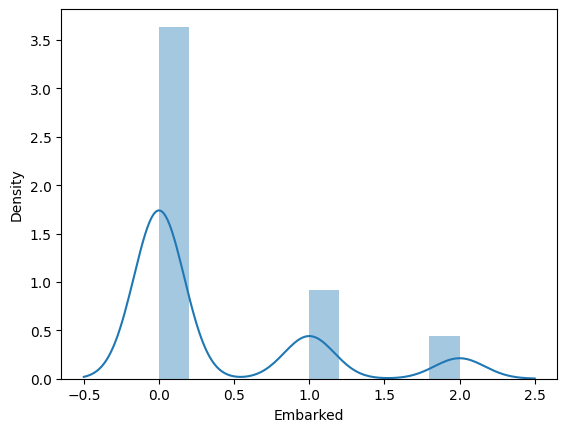

In [77]:
sns.distplot(df_train['Embarked'])

<Axes: xlabel='Sex', ylabel='Survived'>

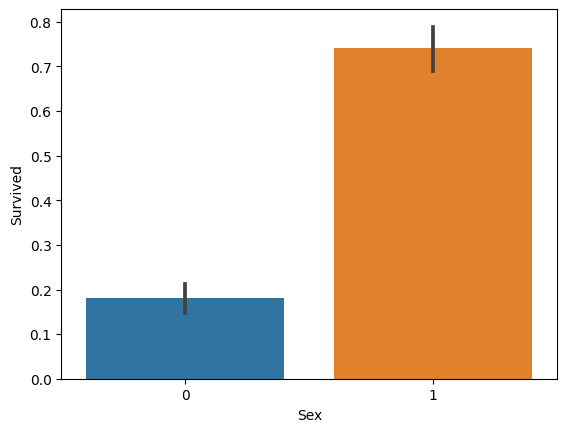

In [78]:
sns.barplot(x='Sex',y='Survived',data=df_train)

<Axes: xlabel='Sex', ylabel='Pclass'>

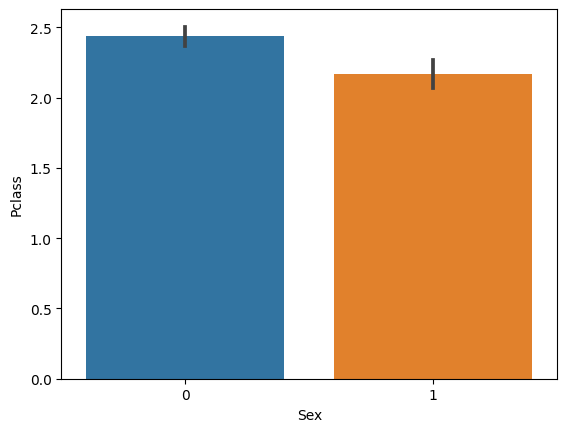

In [79]:
sns.barplot(x='Sex',y='Pclass',data=df_train)

<Axes: xlabel='Pclass', ylabel='Survived'>

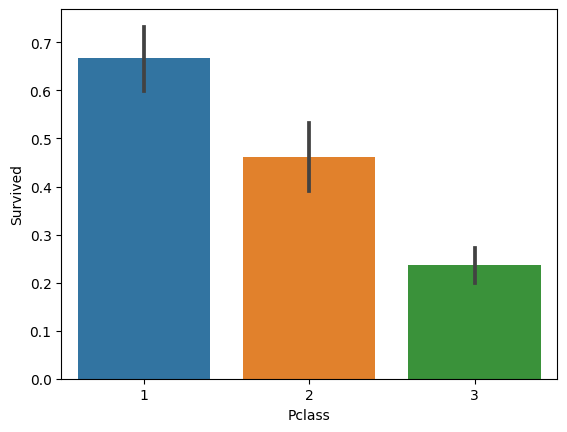

In [80]:
sns.barplot(x='Pclass',y='Survived',data=df_train)

<Axes: xlabel='Age', ylabel='Survived'>

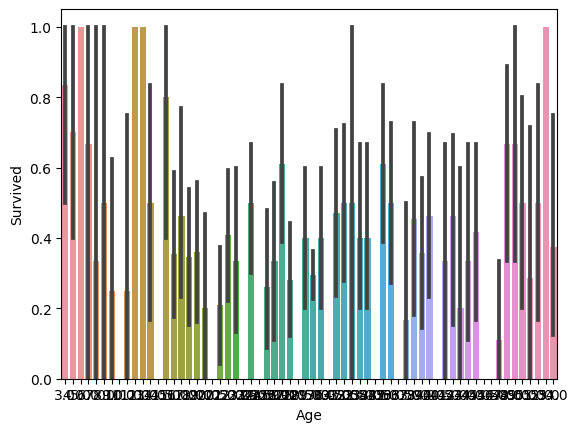

In [81]:
sns.barplot(x='Age',y='Survived',data=df_train)

<Axes: xlabel='Embarked', ylabel='Survived'>

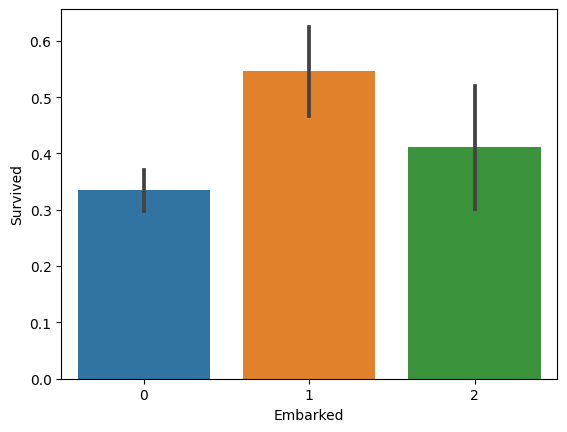

In [82]:
sns.barplot(x='Embarked',y='Survived',data=df_train)

<Axes: xlabel='Sex', ylabel='Pclass'>

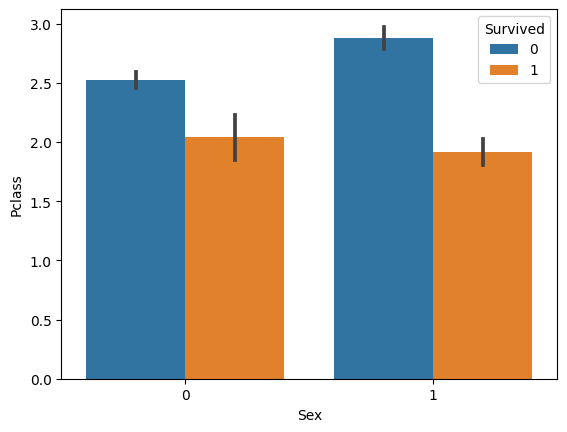

In [83]:
sns.barplot(x='Sex',y='Pclass',hue='Survived',data=df_train,estimator=np.mean)

<Axes: xlabel='Sex', ylabel='count'>

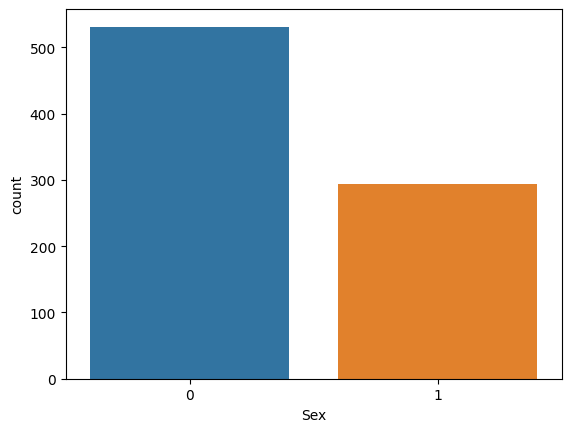

In [84]:
sns.countplot(x='Sex',data=df_train)

<Axes: xlabel='Survived', ylabel='count'>

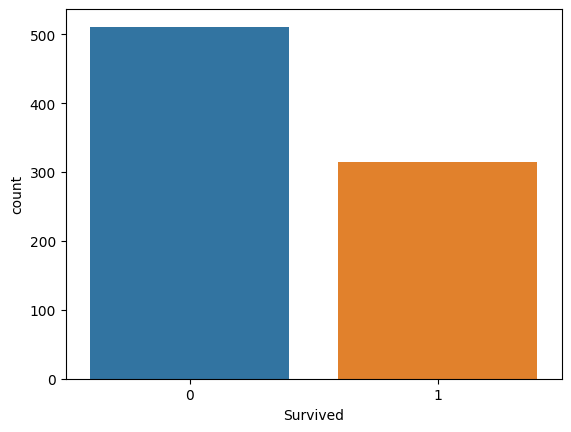

In [85]:
sns.countplot(x='Survived',data=df_train)

<Axes: xlabel='Pclass'>

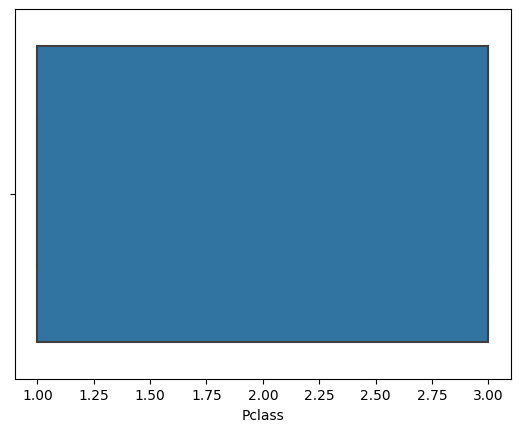

In [86]:
sns.boxplot(x='Pclass',data=df_test)

<Axes: xlabel='Sex'>

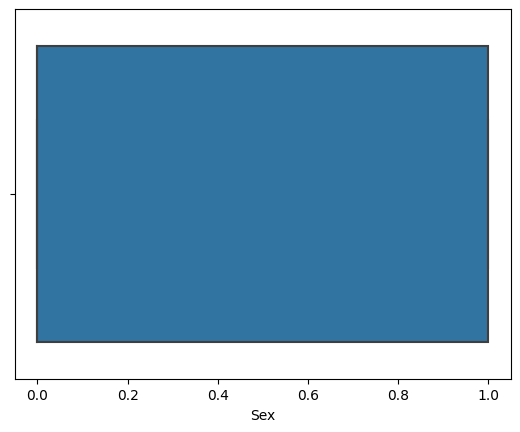

In [87]:
sns.boxplot(x='Sex',data=df_test)

<Axes: xlabel='Age'>

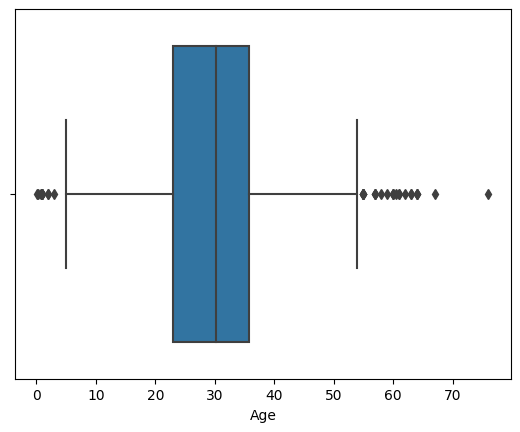

In [88]:
sns.boxplot(x='Age',data=df_test)

<Axes: xlabel='SibSp'>

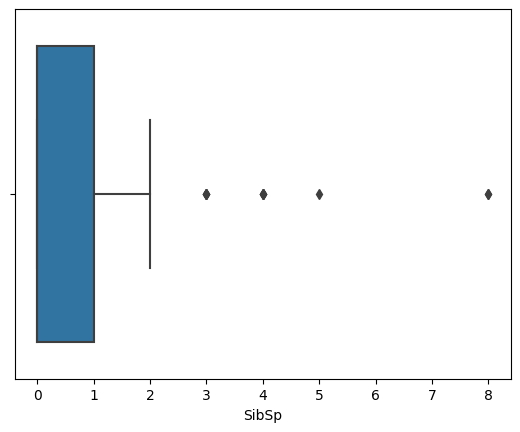

In [89]:
sns.boxplot(x='SibSp',data=df_test)

<Axes: xlabel='Parch'>

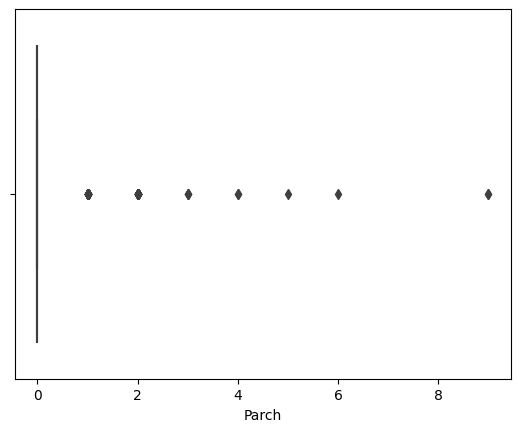

In [90]:
sns.boxplot(x='Parch',data=df_test)

<Axes: xlabel='Embarked'>

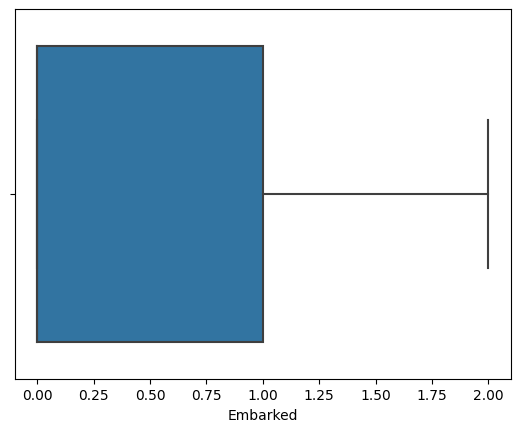

In [91]:
sns.boxplot(x='Embarked',data=df_test)

In [92]:
df_test.corr()

,Pclass,Sex,Age,SibSp,Parch,Embarked
Pclass,1.000000,-0.108615,-0.440782,0.001087,0.018721,0.031096
Sex,-0.108615,1.000000,-0.000011,0.099943,0.159120,0.126779
Age,-0.440782,-0.000011,1.000000,-0.079535,-0.045073,0.089751
SibSp,0.001087,0.099943,-0.079535,1.000000,0.306895,-0.100603
Parch,0.018721,0.159120,-0.045073,0.306895,1.000000,-0.125164
Embarked,0.031096,0.126779,0.089751,-0.100603,-0.125164,1.000000


<Axes: >

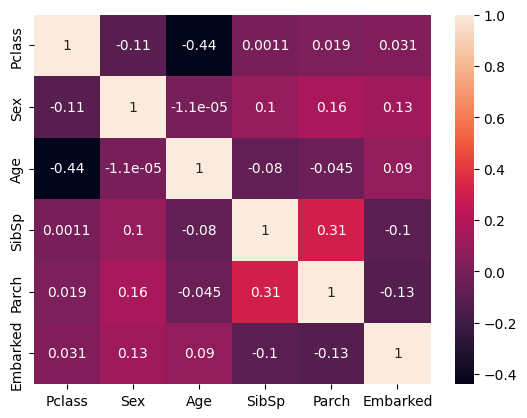

In [93]:
sns.heatmap(df_test.corr(),annot=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2316\2466050504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test['Age'])


<Axes: xlabel='Age', ylabel='Density'>

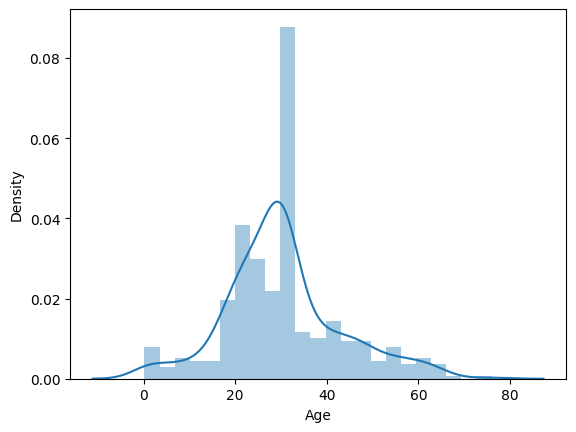

In [94]:
sns.distplot(df_test['Age'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2316\2123715184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test['Pclass'])


<Axes: xlabel='Pclass', ylabel='Density'>

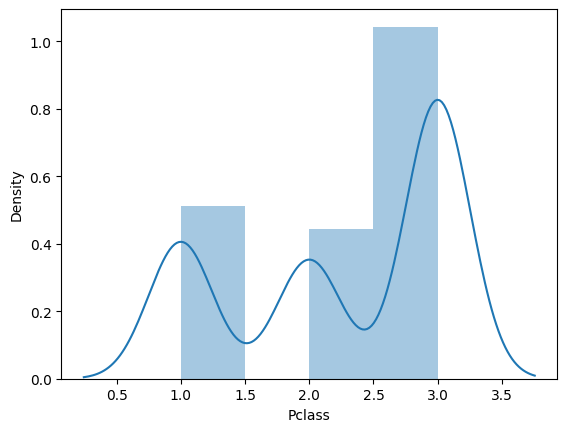

In [95]:
sns.distplot(df_test['Pclass'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2316\4115330167.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test['Sex'])


<Axes: xlabel='Sex', ylabel='Density'>

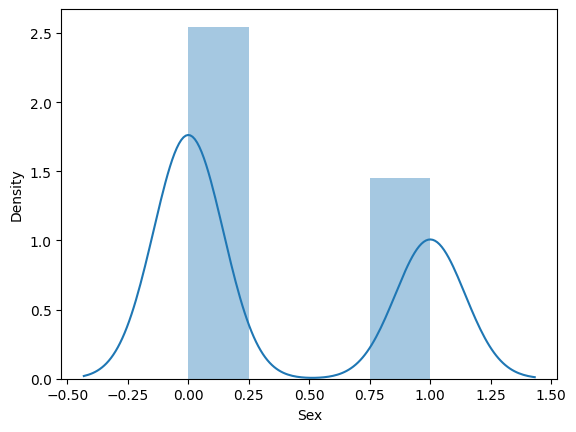

In [96]:
sns.distplot(df_test['Sex'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2316\529372228.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test['Embarked'])


<Axes: xlabel='Embarked', ylabel='Density'>

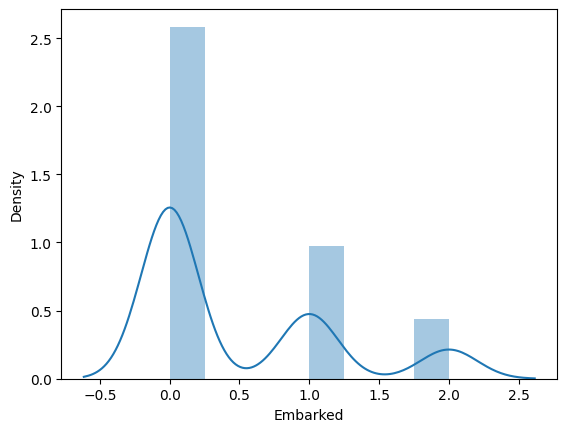

In [97]:
sns.distplot(df_test['Embarked'])

<Axes: xlabel='Sex', ylabel='Pclass'>

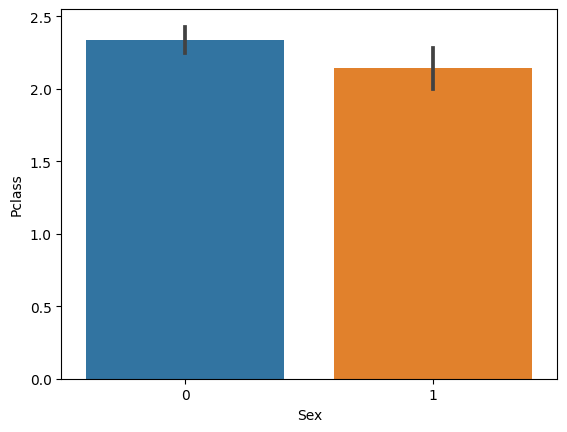

In [98]:
sns.barplot(x='Sex',y='Pclass',data=df_test)

<Axes: xlabel='Sex', ylabel='count'>

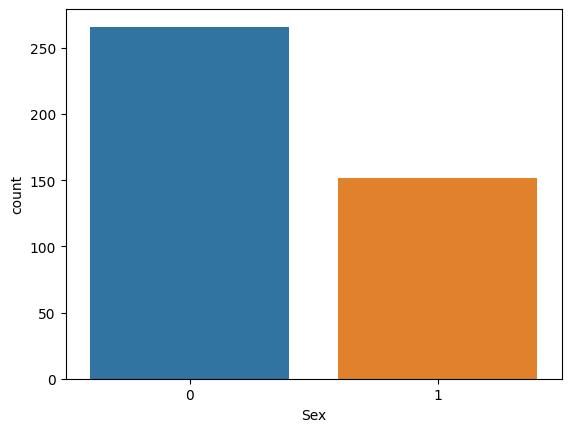

In [99]:
sns.countplot(x='Sex',data=df_test)

In [100]:
# Select independent and dependent Variable

In [101]:
y=df_train.Survived

In [102]:
df_train.drop(columns=['Survived'],inplace=True)

In [103]:
X=df_train

In [104]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.0,1,0,0
1,1,1,38.0,1,0,1
2,3,1,26.0,0,0,0
3,1,1,35.0,1,0,0
4,3,0,35.0,0,0,0


In [105]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [106]:
# scaler=StandardScaler()
# X=scaler.fit_transform(X)

In [107]:
df_copy=df_train.copy()

In [108]:
df_copy

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.000000,1,0,0
1,1,1,38.000000,1,0,1
2,3,1,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,3,0,35.000000,0,0,0
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,0
887,1,1,19.000000,0,0,0
888,3,1,29.699118,1,2,0
889,1,0,26.000000,0,0,1


In [109]:
df_copy=df_train['Age'].copy()

In [110]:
scaler=StandardScaler()

In [111]:
df_copy=scaler.fit_transform([df_copy])

In [112]:
df_copy

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [113]:
# Model
model=LogisticRegression()

In [114]:
# Fit
model.fit(X,y)

LogisticRegression()

In [115]:
# Make pickle file of our Model
pickle.dump(model,open('model.pkl','wb'))

In [116]:
# Predict
y_pred=model.predict(df_test)

In [117]:
X.iloc[0].values

array([ 3.,  0., 22.,  1.,  0.,  0.])

In [118]:
print(model.predict([[ 3.,  0., 22.,  1.,  0.,  0.]]))

[0]


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [119]:
y.iloc[0]

0

In [120]:
print(model.intercept_)

[2.11396427]


In [121]:
print(model.coef_)

[[-1.15168749  2.66077314 -0.03349346 -0.27057844 -0.08667099  0.27308202]]
